In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
from sklearn.svm import SVC

In [10]:
iris = load_iris()
X = iris['data']
y = iris['target']

In [11]:
#splitto il dataset usando anche la stratificazione
etichette = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, stratify=etichette)

In [13]:
#cerco i valori ottimi  degli iperparametri
import numpy 

C_range = list(numpy.arange(0.1, 1.0, 0.1))
C_scores = []
for k in C_range:
    model = SVC(gamma='scale', C=k)
    scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    C_scores.append(scores.mean())
print(C_scores)

[0.9133986928104575, 0.9473039215686274, 0.9538398692810457, 0.9538398692810457, 0.9669117647058824, 0.9669117647058824, 0.9669117647058824, 0.9669117647058824, 0.9669117647058824]


Text(0, 0.5, 'Accuratezza della cross-validation')

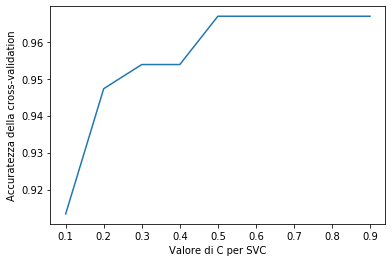

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualizzo mediante un grafico
plt.plot(C_range, C_scores)
plt.xlabel('Valore di C per SVC')
plt.ylabel('Accuratezza della cross-validation')

In [305]:
#Trovo il valore ottimale di gamma
gammas = [0.1, 1, 10, 100]
k_scores = []
for gamma in gammas:
    model = SVC(gamma=gamma)
    scores = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9734477124183006, 0.9738562091503268, 0.960375816993464, 0.5951797385620915]


Text(0, 0.5, 'Accuratezza della cross-validation')

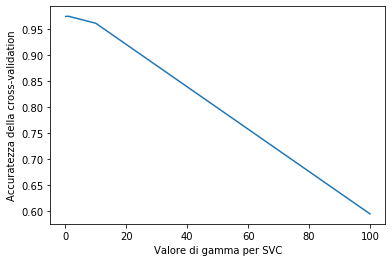

In [307]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualizzo mediante un grafico
plt.plot(gammas, k_scores)
plt.xlabel('Valore di gamma per SVC')
plt.ylabel('Accuratezza della cross-validation')

In [308]:
#i valori degli iperparametri ottimali sono C=0.9 e gamma=0.1
#li uso per addestrare il mio modello e stampo la score e la matrice di confusione
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

model = SVC(gamma=0.1, C=0.9).fit(X_train, y_train)
predizione = model.predict(X_test)

accuracy = accuracy_score(y_test, predizione)

print(f'score {accuracy}')

score 0.98


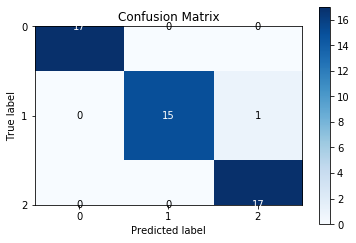

In [309]:
plot_confusion_matrix(y_test, predizione)
plt.show()

In [310]:
#siccome l'holdout e' un po' debole lo ripeto per 5 volte e poi faccio la media degli errori
precisione =[]
for k in range(0,4):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, stratify=etichette)
    model = SVC(gamma=0.1, C=0.9)
    model.fit(X_train, y_train)
    y_predizione = model.predict(X_test)
    precisione.append(metrics.accuracy_score(y_test, y_predizione))
precisione


[0.96, 0.96, 0.98, 0.92]

In [315]:
#Devo ripetere l'holdout solo alla fine o anche durante la ricerca degli iperparametri ottimi?